In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 3})
sns.set_style('ticks')

In [3]:
rng = np.random.default_rng(seed=503)

# simulation problem

Suppose that electrical shocks occur according to a Poisson process with rate $\lambda = 0.25$ per hour. Each shock may cause a certain system to fail. We know that the system can tolerate an average of $100$ electrical shocks. We start observing a newly replaced system at $t = 0$.

## part (a)

What is the expected time until the 100th shock occurs?

In [4]:
expected_time = 100 * 4
print(f'{expected_time = }')

expected_time = 400


## part (b)

Create 100 i.i.d. exponential variables with rate $\lambda$.

In [5]:
lambd = 0.25
rvs = rng.exponential(scale=1/lambd, size=100)

## part (c)

Add them together. This value (call it $t_1$) represents one instance of the Poisson process until the 100th shock occurs.

In [6]:
t_1 = sum(rvs)
print(f'{t_1=:0.2f}')

t_1=413.58


## part (d)

Repeat part (c) $n$ times for different values of $n$ to create other instances of the Poisson process.
Plot the sample mean $\frac{\sum_i^nt_i}{n}$ vs $n$.

In [7]:
n_range = np.arange(1, 1000)
samples = [0 for _ in n_range]
for i, n in enumerate(n_range):
    samples[i] = np.mean([np.sum(rng.exponential(scale=1/lambd, size=100)) for _ in np.arange(n)])

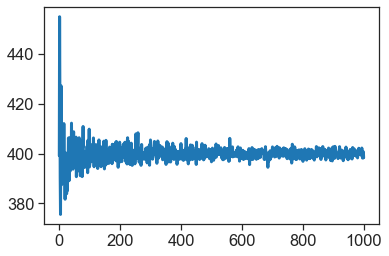

In [8]:
sns.lineplot(x=n_range, y=samples)
plt.show()

## part(e)

What is minimum value of $n$ for which the sample mean in (d) differs from the expected time in part a by at most $2\%$ for all $n \in \{n,n + 1,...,n + 49\}$, i.e. for $50$ consecutive values?

In [9]:
def pct_dif(sample, true):
    return 100 * np.abs(sample - true) / true

In [10]:
n_consecutive = 0
n_min = None
thresh = 2  # percent
for n, sample in enumerate(samples):
    if pct_dif(sample, 400) <= thresh:
        n_consecutive += 1
        if n_min is None: n_min = n
    else:
        n_min = None
        n_consecutive = 0
    if n_consecutive == 50:
        break
    
print(f'The minimum value for which the sample mean differs from the expected time is {n_min=}')

The minimum value for which the sample mean differs from the expected time is n_min=99
